In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read in data
df = pd.read_csv('Life_Expectancy_Data.csv',sep=r'\s*,\s*', engine='python')

df.describe()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [3]:
#remove categorical data
df = df._get_numeric_data()

#Deal with missing data
df = df[df['Life expectancy'].notna()] #drop rows without life expectancy value
df= df.fillna(df.mean())# impute other columns with the columns mean

#create numpy matrices
X = df.drop('Life expectancy',axis=1).to_numpy()
X=np.append(np.ones((X.shape[0],1)),X,axis=1) #add column of 1s
y = df['Life expectancy'].to_numpy()

#initialising weights
theta = np.zeros(X.shape[1])
n=df.shape[0] #number of training examples
d=df.shape[1] #number of features

#parameters
epsilon = 0.1
learning_rate = 0.1

In [ ]:
df.describe()

In [ ]:
print(X)
print(y)

In [4]:
def cost(X,y,theta):
    h= np.dot(X,theta) #don't need to transpose theta as in numpy row vectors and column vectors are the same
    return (1/(2*n))*np.sum(np.square(h-y))

In [ ]:
print(cost(X,y,theta))

In [42]:
def gradient_descent_single_feature(X,y,theta,alpha,epsilon):
    #plot setup
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.scatter(X[:,1],y)
    ax1.set_xlabel("adult mortalility")
    ax1.set_ylabel("life expectancy")
    x_plot = np.linspace(0,700,100)
    ax2.set_xlabel("cost")
    ax2.set_xlabel("no. iterations /10000")
    
    
    n= X.shape[0]
    j = []
    i=0
    old_theta=theta +122
    j.append(cost(X,y,theta))
    while((np.absolute(old_theta-theta)>epsilon).any()):
    #for i in range (200000):
        
        i+=1
        if(i%10000 ==0): 
            ax1.plot(x_plot, theta[0]+x_plot*theta[1], color='grey')
            print('.', end="")
            j.append(cost(X,y,theta))
        h=np.dot(X,theta)
        error = h-y
        old_theta=theta
        theta= theta - (alpha/n)*(np.dot((error),X))
        
    #
    
    ax1.plot(x_plot, theta[0]+x_plot*theta[1], color='orange')
    ax2.plot(j)
    print(f"\n finished in {i} iterations, final cost = {j[len(j)-1]}")
    

In [19]:
gradient_descent(X,y,theta,0.01,0.01)

NameError: name 'gradient_descent' is not defined

Text(0, 0.5, 'life expectancy')

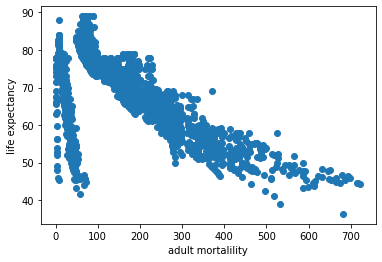

In [48]:
#in this section I will train gradient descent on just 1 feature (adult mortalility)
#to allow for 2 dimensional data representation
#As shown in the figure below,
#Adult mortalility of a country has quite a recognisable relationship with life expectancy
#it is therefore a good feature to use if only using 1.

X_one_feature =X[:,[0,2]] #X matrix containing a row of ones and only the adult mortalility feature
theta_one_feature=theta[0:2]# 2 dimensional vector of zeros

plt.scatter(X_one_feature[:,1],y)
plt.xlabel("adult mortalility")
plt.ylabel("life expectancy")





........................................
 finished in 408348 iterations, final cost = 23.535879053570056


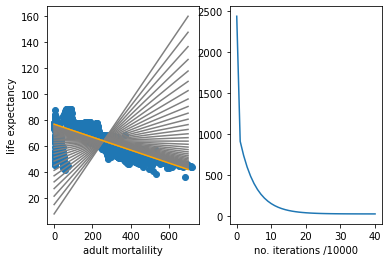

In [47]:
gradient_descent_single_feature(X_one_feature,y,theta_one_feature,0.00003,0.00001) #1 feature GD- adult mortality
#plot shows regression line every 10000 iterations and how it moves until it 
#fits the data

In [ ]:
print(X[0:3,[0,2]])
print(theta[0:3])

In [ ]:
print(y[0:3])